<a href="https://colab.research.google.com/github/jdmartinezrs/MachineLearningAlgoritms/blob/main/KNeighborsClassifierDIVIDIDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix,
                             classification_report, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sheet_id = "1r4szNXN8abPstdpZEtuePc89H6AJPgjq"
sheet_url = f"https://drive.google.com/uc?id={sheet_id}&export=csv"
df = pd.read_csv(sheet_url)

In [4]:
df.rename(columns={
    'Ult Km/Hr': 'Ult_Km',
    'Tipo de Vehiculo': 'Tipo_Vehiculo',
    'Km/Hr Pend': 'Km_Pend',
    'Progreso': 'Progreso'
}, inplace=True)

In [13]:
df['Km_Pend_cls'] = pd.qcut(
    df['Km_Pend'],
    q=3,
    labels=['Bajo', 'Medio', 'Alto']
)

In [14]:
features = ['Ult_Km', 'Tipo_Vehiculo', 'Progreso']
X = df[features]
y = df['Km_Pend_cls']                      # ya categórico


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), ['Ult_Km', 'Progreso']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Tipo_Vehiculo'])
])

In [17]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Ult_Km', 'Progreso']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Tipo_Vehiculo'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

              precision    recall  f1-score   support

        Alto       0.97      0.97      0.97        67
        Bajo       0.97      0.93      0.95        67
       Medio       0.90      0.94      0.92        66

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.94      0.95       200



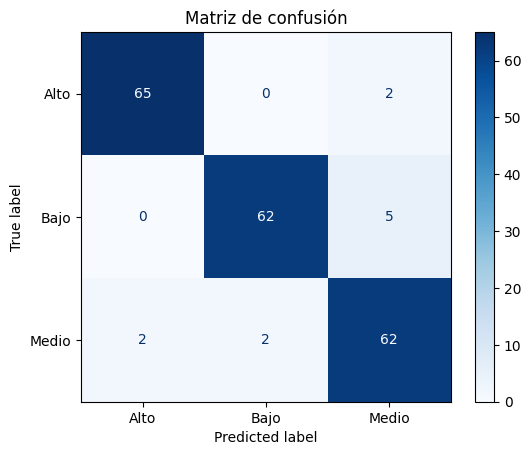

[[65  0  2]
 [ 0 62  5]
 [ 2  2 62]]


In [18]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=2))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.show()
print(cm)

In [11]:
# ⚙️ Ejemplo manual
nuevo_ejemplo = pd.DataFrame([{
    'Ult_Km': 4000,
    'Tipo_Vehiculo': 'TRACTOCAMION',
    'Progreso': 0.2143
}])

# 🧠 Usamos el pipeline entrenado
prediccion = model.predict(nuevo_ejemplo)

print("Clasificación del nuevo ejemplo:", prediccion[0])


Clasificación del nuevo ejemplo: Medio


Datos con **etiquetas** o respuestas conocidas

In [19]:
df['Km_Pend_cls'].value_counts()


,count
Km_Pend_cls,
Alto,334
Bajo,333
Medio,333


In [32]:
df['Km_Pend'].min()


1029.0

In [20]:
df[df['Km_Pend_cls'] == 'Medio'].sample(5)


,Fecha,ITEM,CODIGO DE EQUIPO,Tipo_Vehiculo,fecha de revision,Km/ Hr Plan,Fecha Ult Pre-Operacional,Dias Pend,Ult_Km,Km/Hr Cambio,Fecha Cambio,Fecha Prox Cambio,Unnamed: 12,Km/Hr Proyectada,Km_Pend,Progreso,Unnamed: 16,Observaciones,Km_Pend_cls
54,2024-08-07,55,VE-DT-CH-XMD765,TRACTOCAMION,2024-08-07,10000.0,2024-05-05,94,211122,200927,2024-01-27,2025-06-15,2025-12-12,215039.0,3917.0,0.3917,why,Ago draw need hundred tree myself tonight lead.,Medio
313,2024-12-08,314,VE-DT-FL-XMD825,CARRO TANQUE,2024-12-08,10000.0,2024-09-23,76,231383,229086,2023-10-09,2025-03-14,2025-09-10,237748.0,6365.0,0.6365,turn,It walk lay gas especially answer future.,Medio
227,2025-01-21,228,VE-DT-FL-XMD819,CARRO TANQUE,2025-01-21,10000.0,2024-09-08,135,302018,298118,2024-05-11,2025-07-13,2026-01-09,306030.0,4012.0,0.4012,with,Policy nation single star resource southern half.,Medio
850,2024-12-17,851,VE-DT-HR-XMD957,IRRIGADOR,2024-12-17,10000.0,2024-10-22,56,278223,264184,2024-03-31,2025-04-03,2025-09-30,284658.0,6435.0,0.6435,up,Suddenly maybe discussion sit no make.,Medio
632,2025-04-24,633,VE-DT-FL-XMD993,TRACTOCAMION,2025-04-24,10000.0,2024-09-02,234,215650,201260,2024-05-21,2025-06-24,2025-12-21,221673.0,6023.0,0.6023,hand,Win player truth side where.,Medio


In [21]:
df[df['Km_Pend_cls'] == 'Alto'].sample(5)

,Fecha,ITEM,CODIGO DE EQUIPO,Tipo_Vehiculo,fecha de revision,Km/ Hr Plan,Fecha Ult Pre-Operacional,Dias Pend,Ult_Km,Km/Hr Cambio,Fecha Cambio,Fecha Prox Cambio,Unnamed: 12,Km/Hr Proyectada,Km_Pend,Progreso,Unnamed: 16,Observaciones,Km_Pend_cls
762,2024-10-16,763,VE-DT-CH-XMD428,VOLQ SENCILLA,2024-10-16,10000.0,2023-09-17,395,181351,166555,2023-06-27,2024-12-25,2025-06-23,190139.0,8788.0,0.8788,friend,Red beautiful vote.,Alto
660,2024-09-09,661,VE-DT-CH-XMD442,IRRIGADOR,2024-09-09,10000.0,2024-05-08,124,310028,306020,2023-09-22,2025-07-20,2026-01-16,317228.0,7200.0,0.7200,skin,Down whom story right.,Alto
254,2025-02-07,255,VE-DT-CM-XMD597,GRUA,2025-02-07,10000.0,2023-10-17,479,325569,314614,2022-10-21,2025-06-23,2025-12-20,335007.0,9438.0,0.9438,with,Down later with physical idea.,Alto
668,2024-06-06,669,VE-DT-HR-XMD167,DOBLETROQUE,2024-06-06,10000.0,2023-11-24,195,190473,182228,2023-01-17,2025-03-06,2025-09-02,198840.0,8367.0,0.8367,near,Whether anyone available government letter rich.,Alto
200,2024-11-30,201,VE-DT-CM-XMD375,DOBLETROQUE,2024-11-30,10000.0,2023-04-23,587,251133,241275,2022-11-13,2025-04-09,2025-10-06,260772.0,9639.0,0.9639,treat,Discussion own Republican interest book.,Alto


In [22]:
df[df['Km_Pend_cls'] == 'Bajo'].sample(5)

,Fecha,ITEM,CODIGO DE EQUIPO,Tipo_Vehiculo,fecha de revision,Km/ Hr Plan,Fecha Ult Pre-Operacional,Dias Pend,Ult_Km,Km/Hr Cambio,Fecha Cambio,Fecha Prox Cambio,Unnamed: 12,Km/Hr Proyectada,Km_Pend,Progreso,Unnamed: 16,Observaciones,Km_Pend_cls
53,2025-02-17,54,VE-DT-FL-XMD170,GRUA,2025-02-17,10000.0,2023-05-31,628,348880,339390,2022-10-11,2025-12-07,2026-06-05,351482.0,2602.0,0.2602,weight,Place number idea born.,Bajo
805,2024-06-14,806,VE-DT-CH-XMD362,TRACTOCAMION,2024-06-14,10000.0,2024-04-04,71,294463,290369,2023-09-24,2024-11-22,2025-05-21,297729.0,3266.0,0.3266,able,Charge spend during fight team.,Bajo
157,2024-12-28,158,VE-DT-CM-XMD345,CARRO TANQUE,2024-12-28,10000.0,2024-01-04,359,285602,273549,2023-03-01,2025-04-12,2025-10-09,287938.0,2336.0,0.2336,quality,Home need material article.,Bajo
513,2025-02-01,514,VE-DT-CH-XMD713,IRRIGADOR,2025-02-01,10000.0,2023-09-14,506,222976,214720,2022-10-04,2025-11-29,2026-05-28,225023.0,2047.0,0.2047,study,Establish concern allow director than green.,Bajo
171,2024-06-21,172,VE-DT-CM-XMD639,DOBLETROQUE,2024-06-21,10000.0,2023-06-18,369,346624,339956,2023-05-09,2025-01-10,2025-07-09,349475.0,2851.0,0.2851,clear,Pay paper think still community international ...,Bajo


In [12]:
print(df['Km_Pend'].describe())
print(df['Km_Pend'].value_counts(bins=5))


count    1000.000000
mean     5453.494000
std      2603.632593
min      1029.000000
25%      3241.500000
50%      5354.000000
75%      7722.500000
max      9995.000000
Name: Km_Pend, dtype: float64
(4615.4, 6408.6]      214
(2822.2, 4615.4]      209
(1020.033, 2822.2]    205
(8201.8, 9995.0]      201
(6408.6, 8201.8]      171
Name: count, dtype: int64
